# Images integrity

The goal of this notebook is to establish the validity of applying specific image transformations to raw video frames.

In [1]:
from footvid.utils.env import check_repository_path


REPOSITORY_DIR = check_repository_path()
RAW_DATA_DIR = REPOSITORY_DIR.joinpath("data", "raw")

## Resolution

First, let's count the number of occurrences of individual images size across raw file directories. Raw file directory should have the following structure:

In [2]:
!tree -d ../data/raw/

../data/raw/
├── FrameFilter-set1_4k
│   ├── neg
│   └── pos
├── FrameFilter-set2_fifawc2018
│   ├── neg
│   └── pos
├── FrameFilter-set3_fhd
│   ├── neg
│   └── pos
└── FrameFilter-test_set

10 directories


In [3]:
import pandas as pd
from IPython.display import display

from footvid.utils.images import count_images_size


n_neg = 0
n_pos = 0
print("---- Training dataset raw files size ----\n\n")
for data_folder in sorted(RAW_DATA_DIR.glob("*")):
    if data_folder.is_dir():
        for label_folder in data_folder.glob("*"):
            if label_folder.is_dir():
                print(f"`{data_folder.name}/{label_folder.name}` images size:")
                size_counter = count_images_size(label_folder)
                size_df = pd.DataFrame.from_dict(
                    size_counter,
                    orient="index",
                ).reset_index()
                size_df.columns = ["size", "n_obs"]
                display(size_df.sort_values(by="n_obs", ascending=False))
                if label_folder.name == "neg":
                    n_neg += size_df["n_obs"].sum()
                elif label_folder.name == "pos":
                    n_pos += size_df["n_obs"].sum()
                print("\n")

---- Training dataset raw files size ----


`FrameFilter-set1_4k/neg` images size:


,size,n_obs
0,"(3840, 2160)",422
1,"(3840, 2026)",45
2,"(3820, 2160)",15




`FrameFilter-set1_4k/pos` images size:


,size,n_obs
1,"(3840, 2160)",371
0,"(3840, 2026)",39
2,"(3820, 2160)",7




`FrameFilter-set2_fifawc2018/neg` images size:


,size,n_obs
0,"(1920, 1080)",238
1,"(3840, 2160)",110




`FrameFilter-set2_fifawc2018/pos` images size:


,size,n_obs
0,"(3840, 2160)",247
1,"(1920, 1080)",228




`FrameFilter-set3_fhd/neg` images size:


,size,n_obs
0,"(1920, 1080)",505




`FrameFilter-set3_fhd/pos` images size:


,size,n_obs
0,"(1920, 1080)",751


We can see that the vast majority of images are in $16:9$ resolution or very close to this. It's an important observation, because we will probably keep this resolution while adjusting the size of the images in the further modeling process.

## Imbalance

Using the previously counted number of negative `n_neg` and positive `n_pos` observations, let's check the balance of the dataset.

In [4]:
print(
    "There is {0:.2f}% of positive observations across the whole dataset\n"
    "with {1} positive and {2} negative observations."
    .format(
        100 * n_pos / (n_pos + n_neg),
        n_pos,
        n_neg,
    )
)

There is 55.17% of positive observations across the whole dataset
with 1643 positive and 1335 negative observations.


We can see that the dataset is pretty small and well balanced. This gives us the confidence that even a simple metric such as **accuracy** will work well in the assessing of the model performance. Such a small dataset means that training the Deep Learning model from scratch will not give the best results, hence it is worth considering the classic Computer Vision methods (f.e. HOG feature extraction + SVM classifier) or transfer learning.

## Visualization

Let's view an example subset of images that we'll be dealing with.

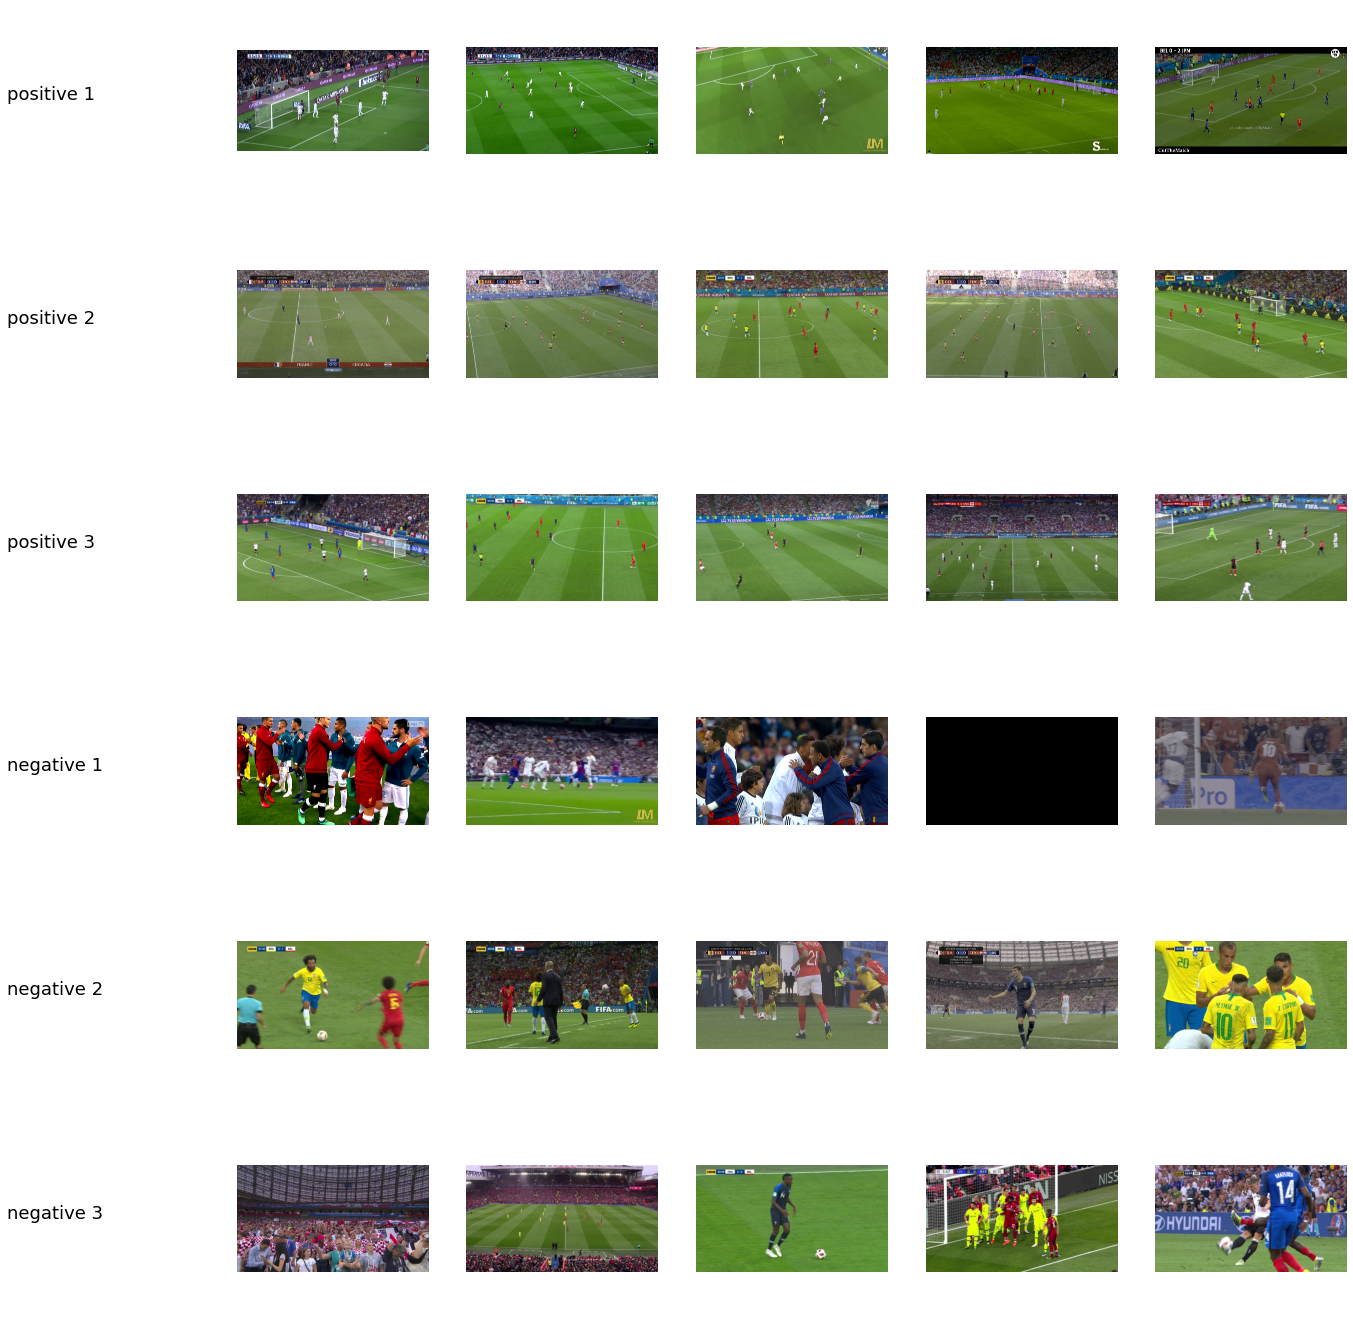

In [5]:
import matplotlib.pyplot as plt

from footvid.utils.images import plot_directories_representation


fig = plot_directories_representation(
    dirs={
        "positive 1": RAW_DATA_DIR.joinpath("FrameFilter-set1_4k", "pos"),
        "positive 2": RAW_DATA_DIR.joinpath("FrameFilter-set2_fifawc2018", "pos"),
        "positive 3": RAW_DATA_DIR.joinpath("FrameFilter-set3_fhd", "pos"),
        "negative 1": RAW_DATA_DIR.joinpath("FrameFilter-set1_4k", "neg"),
        "negative 2": RAW_DATA_DIR.joinpath("FrameFilter-set2_fifawc2018", "neg"),
        "negative 3": RAW_DATA_DIR.joinpath("FrameFilter-set3_fhd", "neg"),
    },
    n_images=5,
    fig_params={"figsize": (24, 24)},
    text_params={"fontsize": 18},
)
plt.savefig(REPOSITORY_DIR.joinpath("docs", "images", "example-video-frames.png"))
plt.show()